# Single Slice Ptychography on full datasets and also cropped datasets

### Acknowledgements

This tutorial was adapted from "ptychography_02.ipynb" by the py4DSTEM `phase_contrast` team:
- Steven Zeltmann (steven.zeltmann@lbl.gov)
- Georgios Varnavides (gvarnavides@berkeley.edu)
- Stephanie Ribet (sribet@lbl.gov)
- Colin Ophus (clophus@lbl.gov)

Last updated 2025 June 11

In [ ]:
import numpy as np
import py4DSTEM
import matplotlib.pyplot as plt

from py4DSTEM.process.phase.utils import get_array_module

print(py4DSTEM.__version__)


cupyx.jit.rawkernel is experimental. The interface can change in the future.


0.14.18


In [ ]:
path = 'C:\\_Data\\wendy_data\\' # Path to the dataset
al2_partial = path + 'al2_dataset_masked_partial_loc10_w40.h5'
probe_path = path + '2D_probe.h5'

In [27]:
dataset = py4DSTEM.read(al2_partial)
probe = py4DSTEM.read(probe_path)

full_interface_data = py4DSTEM.read(path+'processed_al1.h5')

In [28]:
probe #ideally the probe should be a 2D array

VirtualDiffraction( A 2-dimensional array of shape (192, 192) called 'dp_mean',
                    with dimensions:

                        dim0 = [0,1,2,...] pixels
                        dim1 = [0,1,2,...] pixels
)

In [29]:
dataset #double check the calibration and the units of the dataset

DataCube( A 4-dimensional array of shape (40, 40, 192, 192) called 'datacube',
          with dimensions:

              Rx = [0.0,0.34555085515441486,0.6911017103088297,...] A
              Ry = [0.0,0.34555085515441486,0.6911017103088297,...] A
              Qx = [0.0,0.45449762893741413,0.9089952578748283,...] mrad
              Qy = [0.0,0.45449762893741413,0.9089952578748283,...] mrad
)

## Single Slice

### first attempt

Reconstructing the dataset with the most 

Calculating center of mass: 100%|██████████| 65536/65536 [00:19<00:00, 3285.27probe position/s]
Best fit rotation = -4 degrees.
Normalizing amplitudes: 100%|██████████| 65536/65536 [03:09<00:00, 345.07probe position/s]
Performing 128 iterations using a complex object type, with the gradient-descent algorithm, with normalization_min: 1 and step_size: 0.5, in batches of max 512 measurements.
Reconstructing object and probe: 100%|██████████| 128/128 [14:35<00:00,  6.84s/ iter]


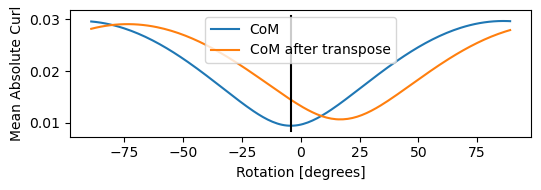

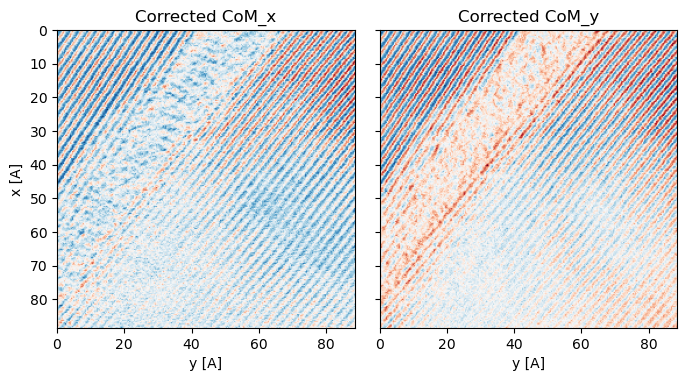

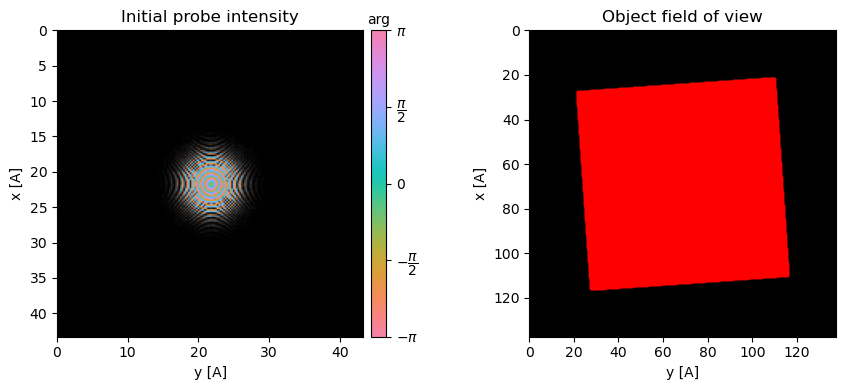

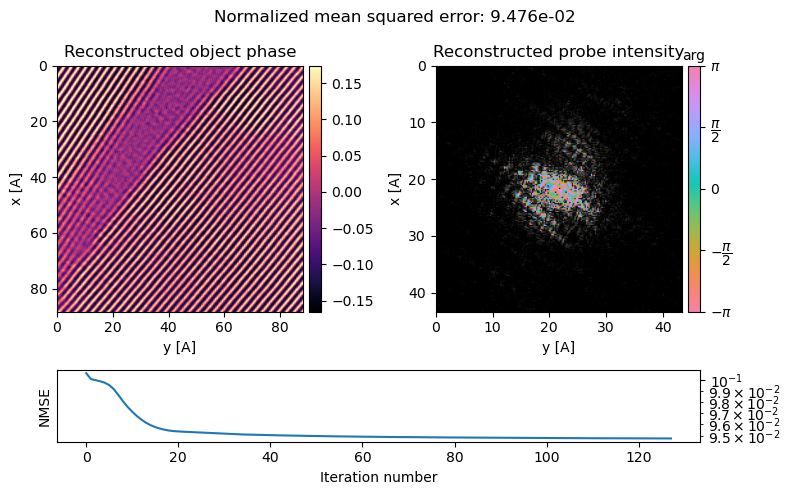

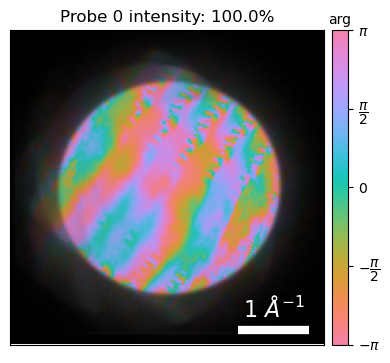

In [30]:
ptycho1 = py4DSTEM.process.phase.SingleslicePtychography(
    datacube=full_interface_data,
    energy=300e3,
    defocus=-15,
    vacuum_probe_intensity=probe.data,
    verbose=True,
    device='gpu', # uncomment if you have access to a GPU
    storage='cpu', # uncomment if you have access to a GPU
    semiangle_cutoff = 30,

)


ptycho = ptycho1.preprocess(
    plot_rotation=True,
    plot_center_of_mass = True,
    plot_probe_overlaps = True,
    vectorized_com_calculation = False, # disable default CoM vectorized calc
    store_initial_arrays= False, # don't store arrays necessary for reset=True
    max_batch_size= 128, # set max batch size for GPU memory
    clear_fft_cache=True, # clear the FFT cache to free GPU memory
)


ptycho00 = ptycho.reconstruct(
    num_iter = 128,
    seed_random=0,
    max_batch_size=512,
    fix_probe = False,

).visualize(
)
ptycho.show_fourier_probe()

### Optimizing on cropped data

In [6]:


ptycho1 = py4DSTEM.process.phase.SingleslicePtychography(
    datacube=dataset,
    energy=300e3,
    defocus=-15,
    vacuum_probe_intensity=probe.data,
    verbose=True,
    device='gpu', # uncomment if you have access to a GPU
    storage='cpu', # uncomment if you have access to a GPU
    semiangle_cutoff = 30,
    # num_slices=5,
    # slice_thicknesses=150,
)


Resampling 4D datacube: 100%|██████████| 1.60k/1.60k [00:02<00:00, 754DP/s]
Calculating center of mass: 100%|██████████| 1600/1600 [00:00<00:00, 3036.01probe position/s]
Best fit rotation forced to -7 degrees.
Normalizing amplitudes: 100%|██████████| 1600/1600 [00:08<00:00, 190.52probe position/s]


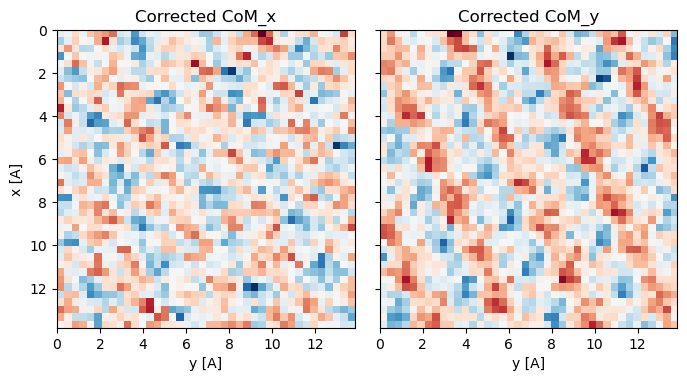

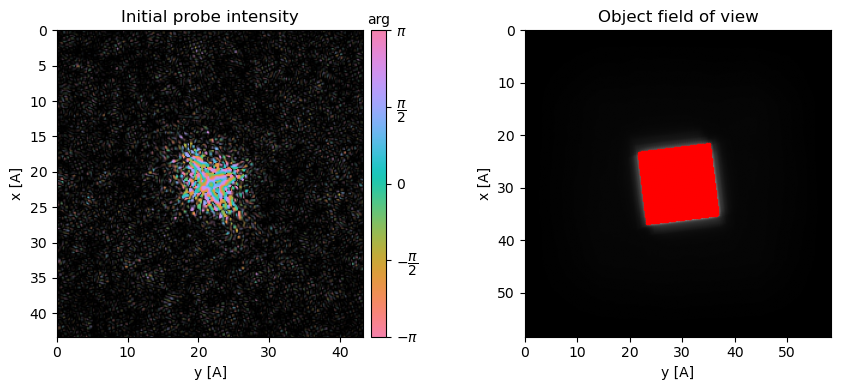

In [ ]:

ptycho = ptycho1.preprocess(
    plot_rotation=True,
    plot_center_of_mass = True,
    plot_probe_overlaps = True,
    vectorized_com_calculation = False, # disable default CoM vectorized calc
    store_initial_arrays= False, # don't store arrays necessary for reset=True
    max_batch_size= 128, # set max batch size for GPU memory
    clear_fft_cache=True, # clear the FFT cache to free GPU memory
    force_com_rotation = -7,
)


Continuing reconstruction from previous result. Use reset=True for a fresh start.
Performing 128 iterations using a complex object type, with the gradient-descent algorithm, with normalization_min: 1 and step_size: 0.5, in batches of max 512 measurements.
Reconstructing object and probe: 100%|██████████| 128/128 [00:38<00:00,  3.29 iter/s]


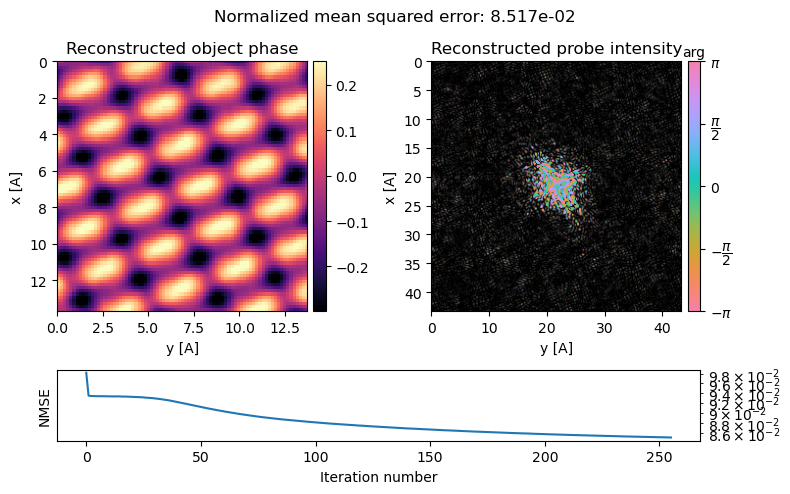

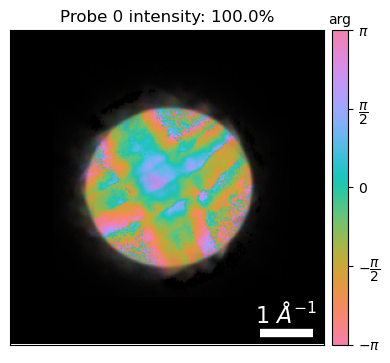

In [12]:

ptycho00 = ptycho.reconstruct(
    num_iter = 128,
    seed_random=0,
    max_batch_size=512,
    fix_probe = False,

).visualize(
)
ptycho.show_fourier_probe()

In [ ]:
import datetime

def now_str():
    return datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

In [ ]:
now_str()

'2025-06-07_12-17-17'

### Optimization code with FFT and fourier probe plotting

Best fit rotation = -15 degrees.
Normalizing amplitudes: 100%|██████████| 2500/2500 [00:07<00:00, 349.34probe position/s]
Performing 64 iterations using a complex object type, with the gradient-descent algorithm, with normalization_min: 1 and step_size: 0.5, in batches of max 512 measurements.
Reconstructing object and probe: 100%|██████████| 64/64 [00:16<00:00,  3.84 iter/s]
Best fit rotation = -15 degrees.
Normalizing amplitudes: 100%|██████████| 2500/2500 [00:07<00:00, 350.88probe position/s]
Performing 64 iterations using a complex object type, with the gradient-descent algorithm, with normalization_min: 1 and step_size: 0.5, in batches of max 512 measurements.
Reconstructing object and probe: 100%|██████████| 64/64 [00:16<00:00,  3.87 iter/s]
Best fit rotation = -15 degrees.
Normalizing amplitudes: 100%|██████████| 2500/2500 [00:07<00:00, 352.15probe position/s]
Performing 64 iterations using a complex object type, with the gradient-descent algorithm, with normalization_min: 1 and

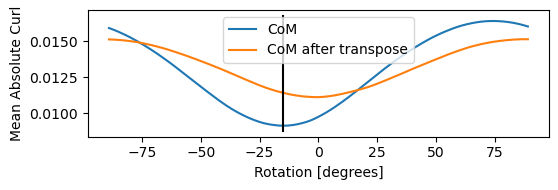

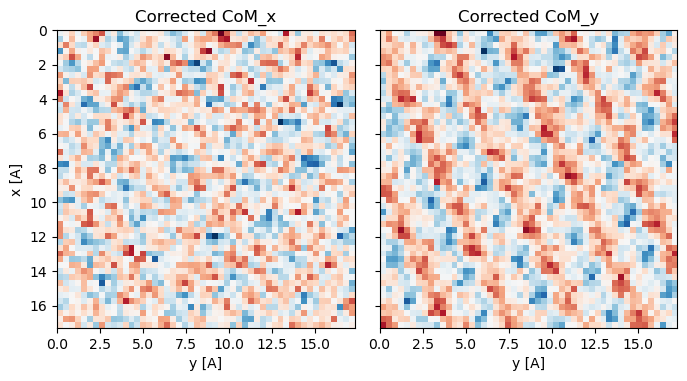

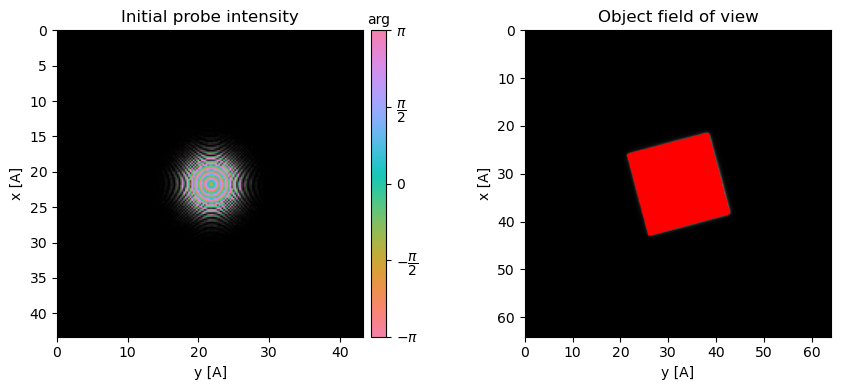

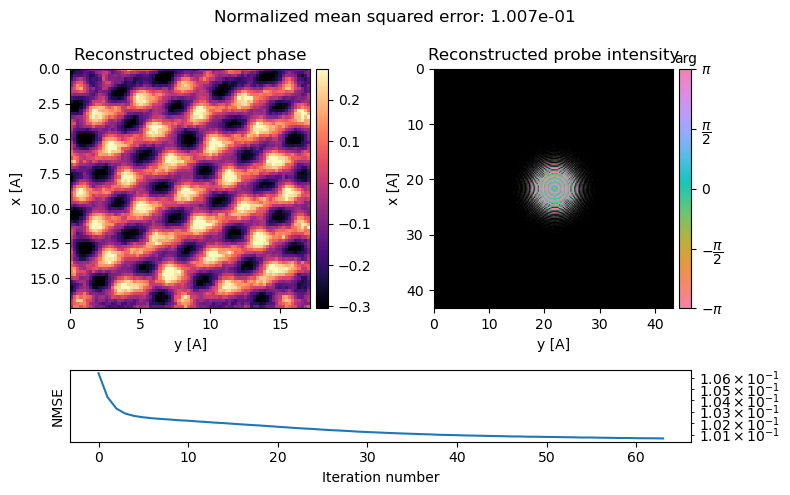

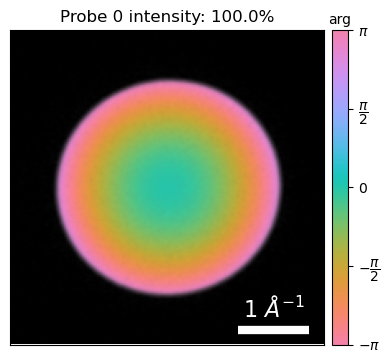

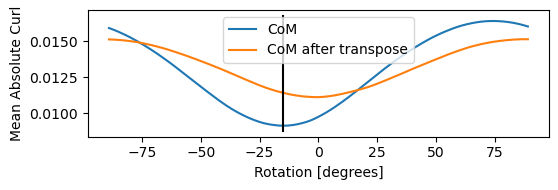

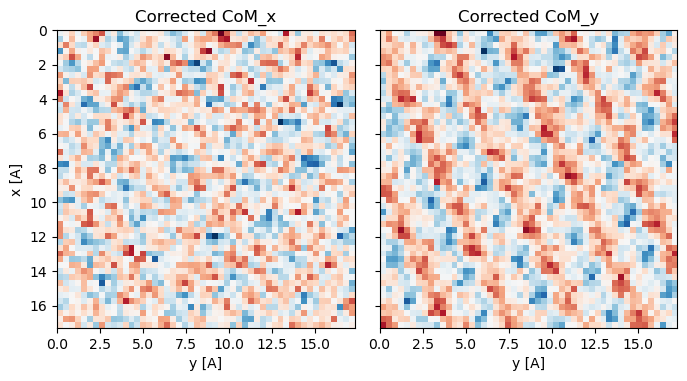

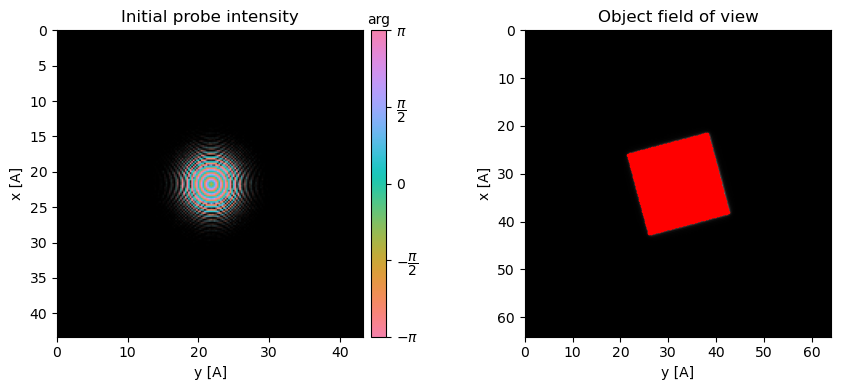

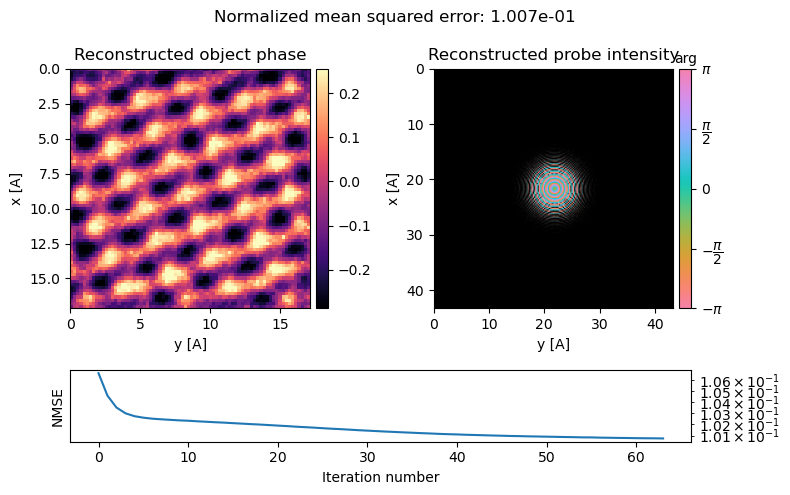

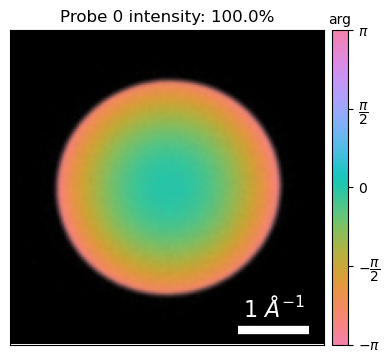

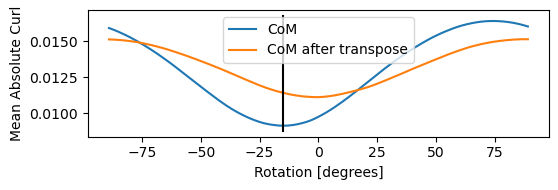

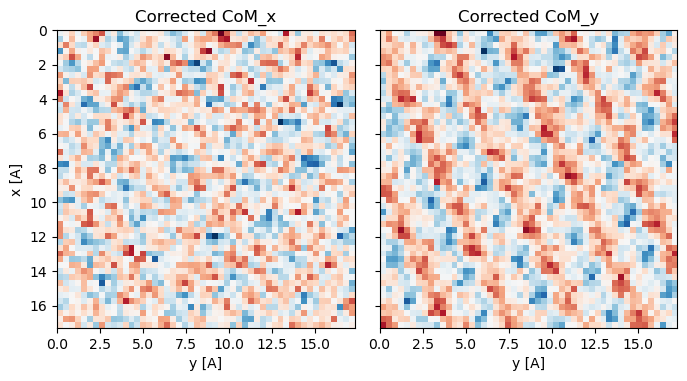

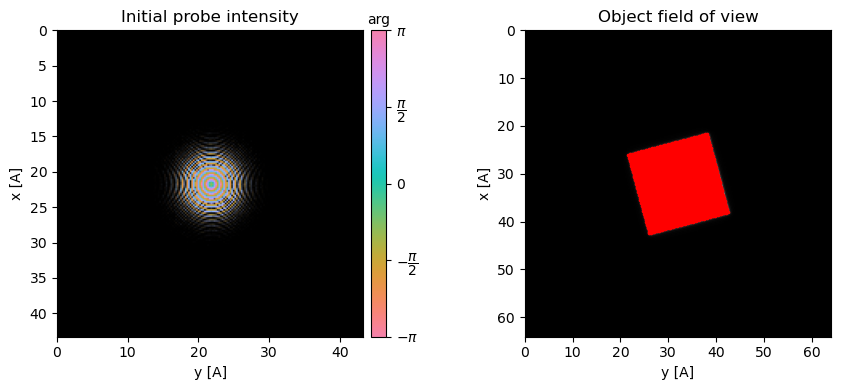

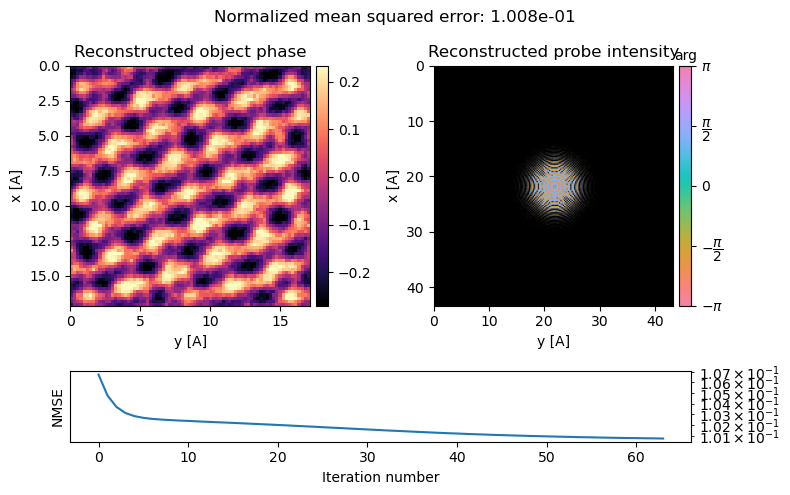

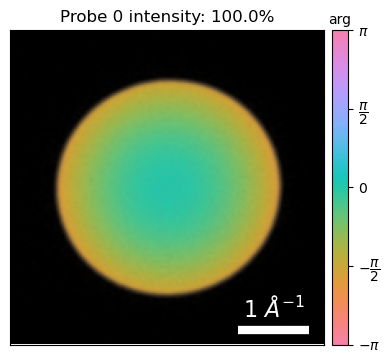

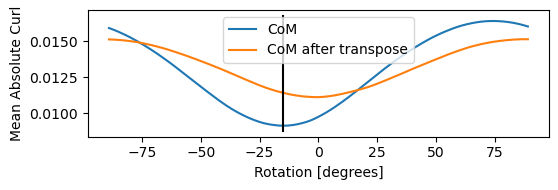

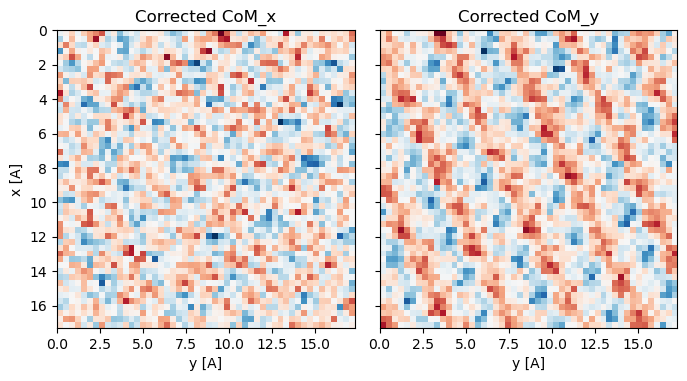

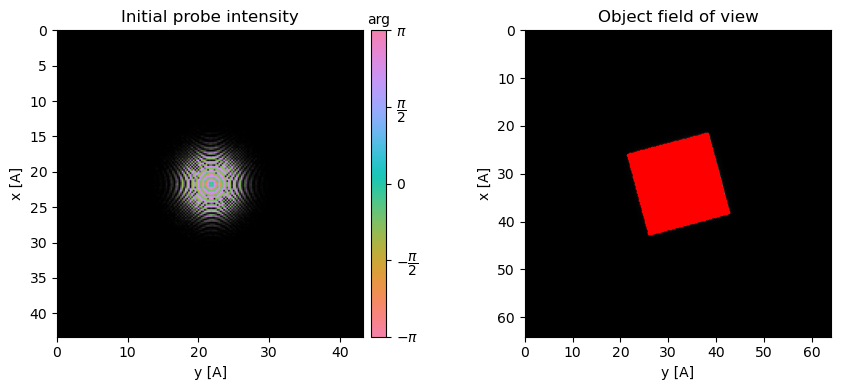

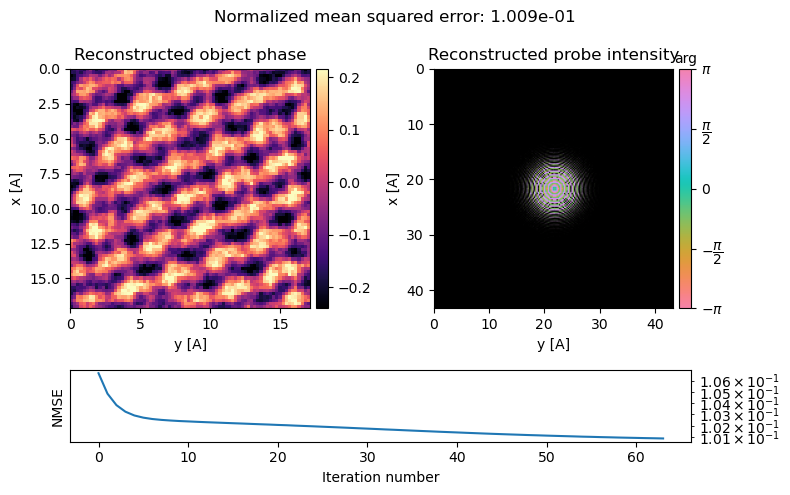

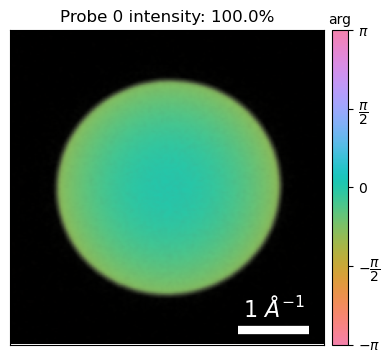

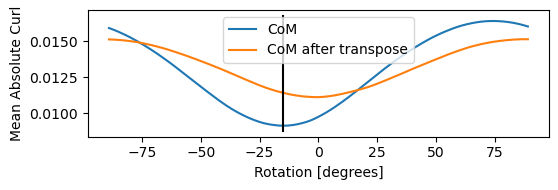

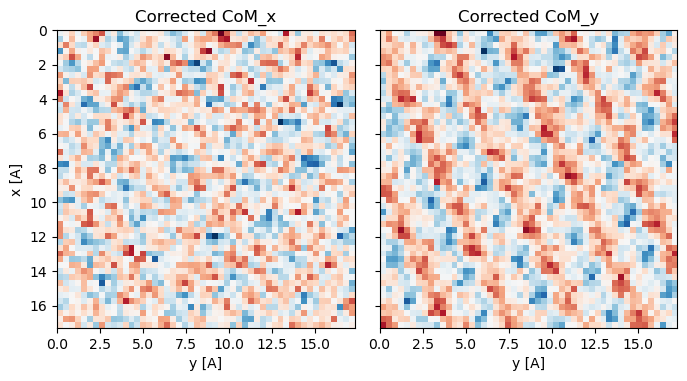

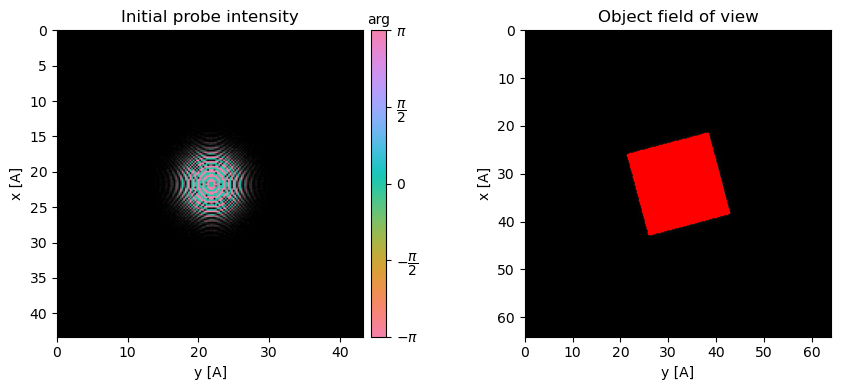

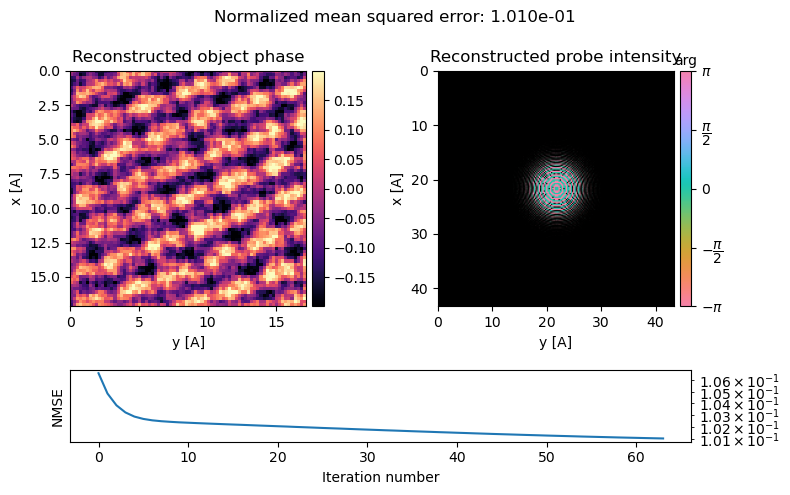

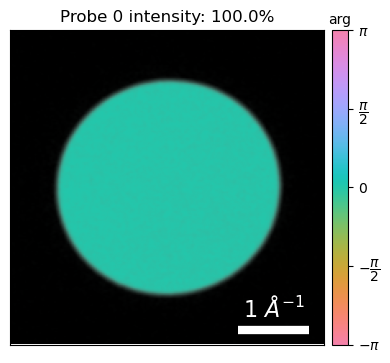

In [ ]:
ptychos_sweep_roll = []
ptychos_object = []
ptychos_object_fft = []

sweep_param = np.linspace(-25,0,5)

for roll in sweep_param:
    ptycho1 = py4DSTEM.process.phase.SingleslicePtychography(
        datacube=dataset,
        energy=300e3,
        defocus=roll,
        vacuum_probe_intensity=probe.data,
        verbose=True,
        device='gpu', # uncomment if you have access to a GPU
        storage='cpu', # uncomment if you have access to a GPU
        semiangle_cutoff = 30,
    )

    ptycho = ptycho1.preprocess(
        plot_rotation=True,
        plot_center_of_mass = True,
        plot_probe_overlaps = True,
        # vectorized_com_calculation = False, # disable default CoM vectorized calc
        # store_initial_arrays= False, # don't store arrays necessary for reset=True
        max_batch_size= 128, # set max batch size for GPU memory
        clear_fft_cache=True, # clear the FFT cache to free GPU memory
    )
    ptycho00 = ptycho.reconstruct(
        num_iter = 64,
        seed_random=0,
        max_batch_size=512,
        fix_probe = True,
    ).visualize(
    )
    ptycho.show_fourier_probe()

    ptychos_sweep_roll.append(ptycho00)

    ptychos_object.append( np.angle(ptycho00.object_cropped).copy())
    ptychos_object_fft.append(ptycho00.object_fft)

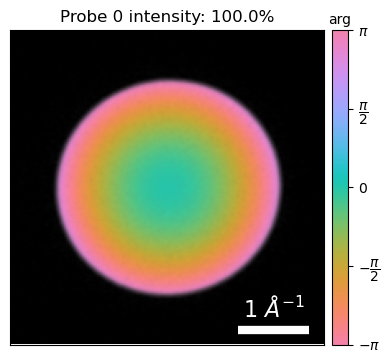

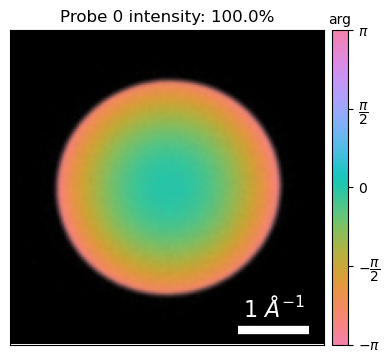

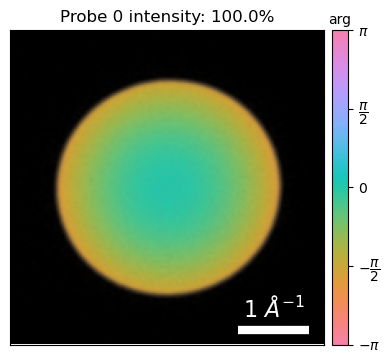

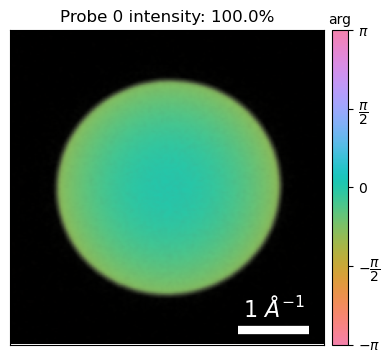

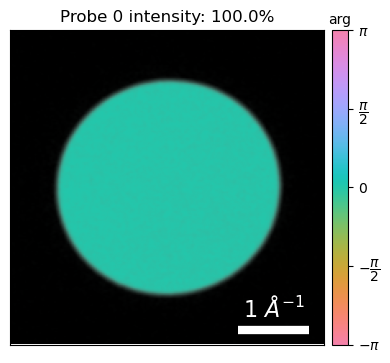

In [ ]:
probe_intensities = []
probe_images = []
for i, p in enumerate(ptychos_sweep_roll):
    probe_intensity = np.abs(p.probe.copy())
    probe_intensities.append(probe_intensity)

    p.show_fourier_probe()
    plt.savefig(f'test_probe{i}.png', dpi=300, bbox_inches='tight')

    probe_images.append(plt.imread(f'test_probe{i}.png'))

    # py4DSTEM.show(
    #     probe_intensity
    # )

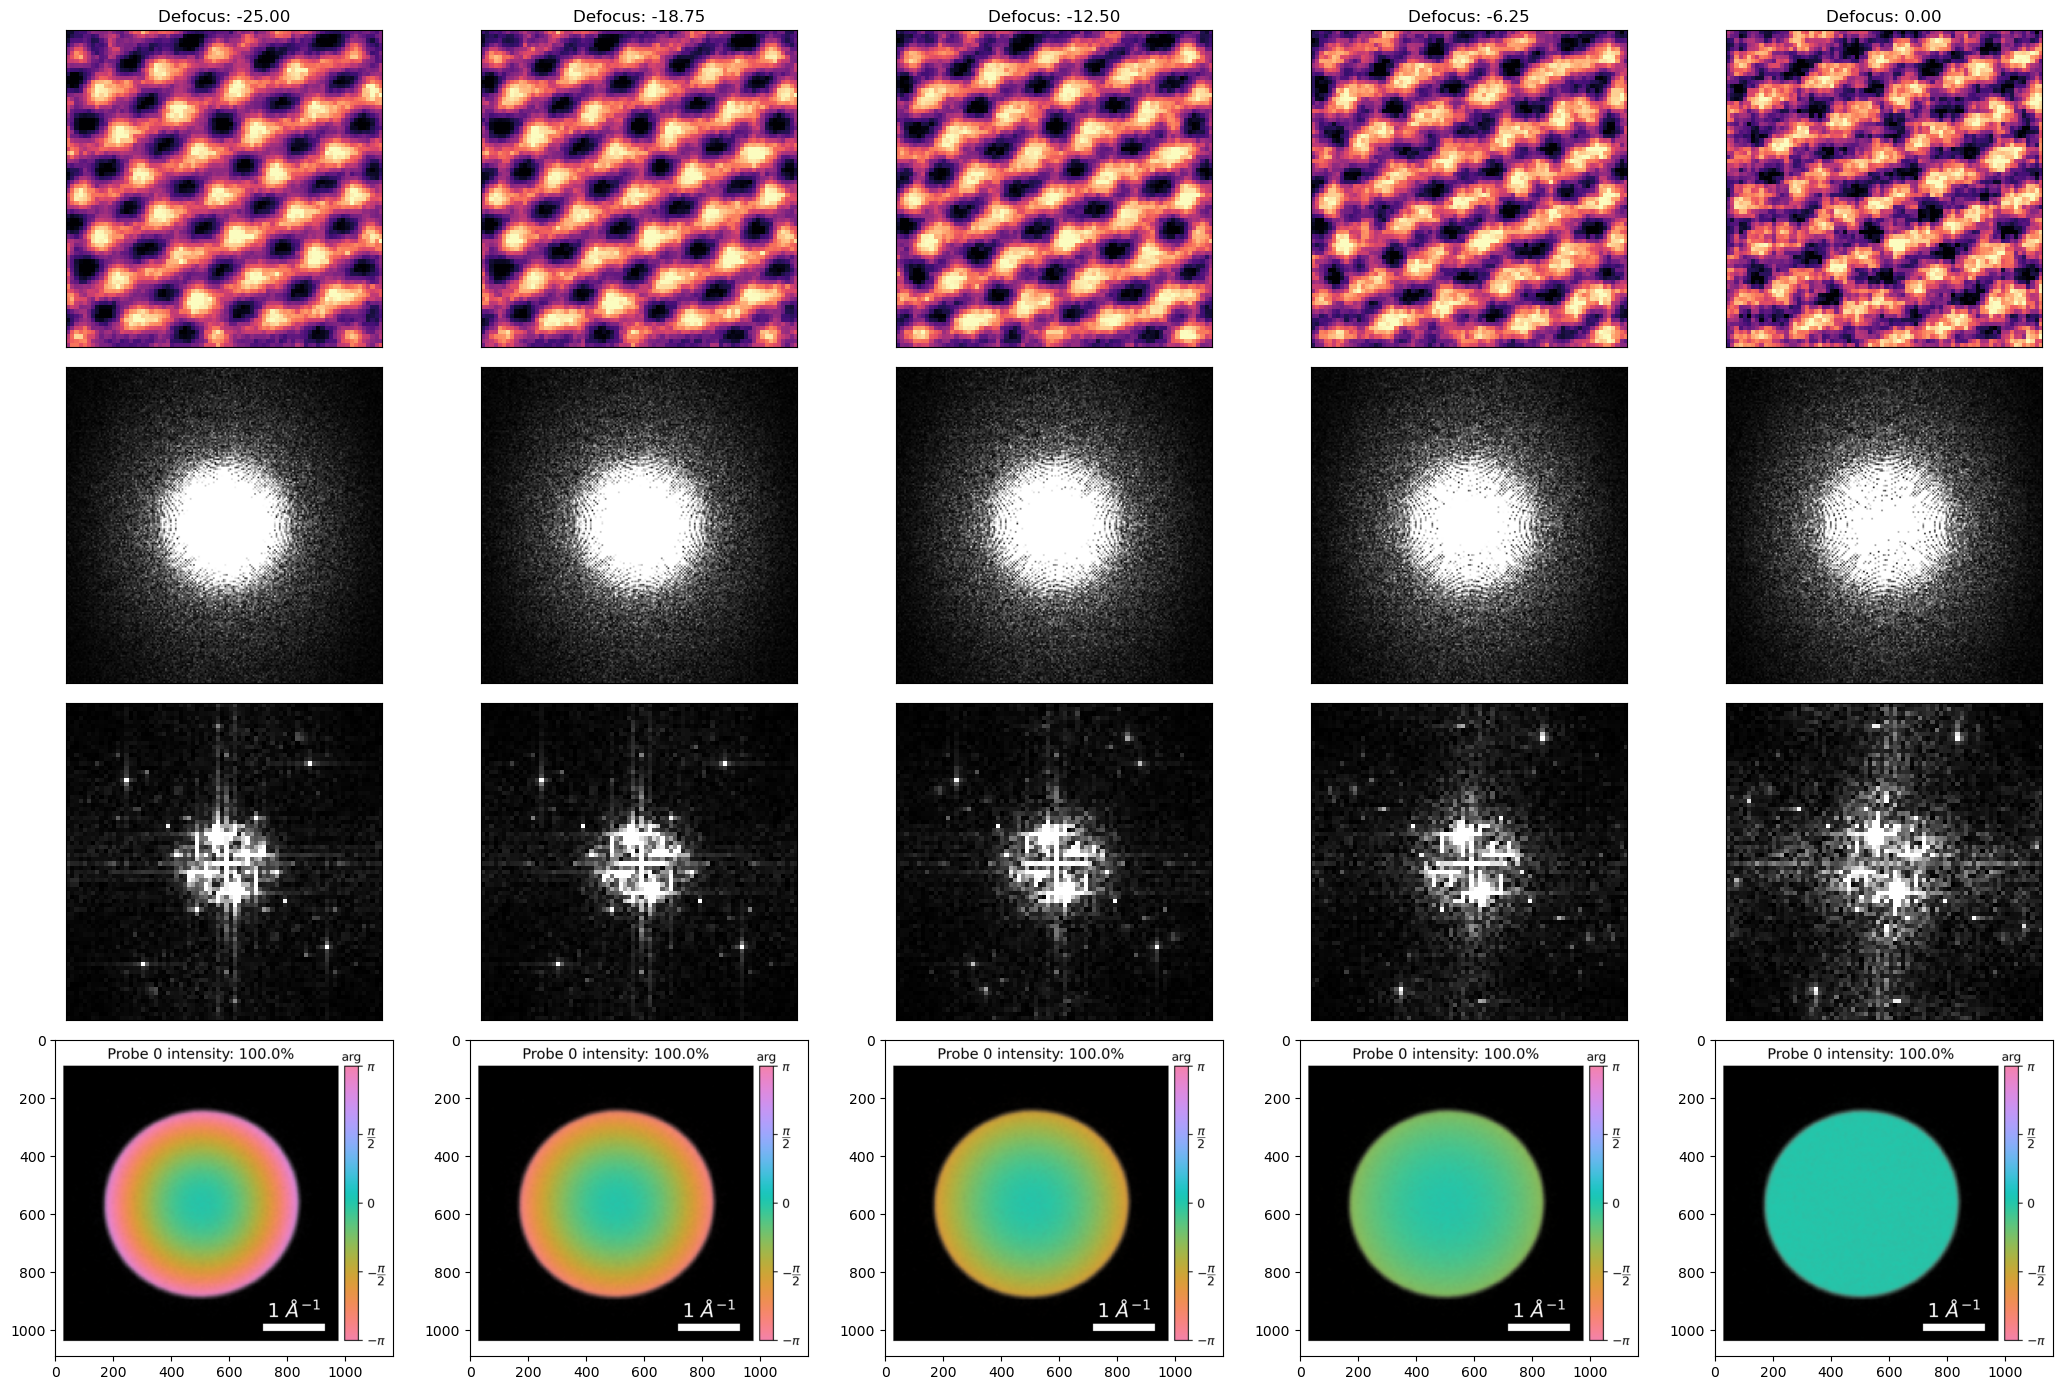

In [ ]:
fig, axs = plt.subplots(4,len(ptychos_object),figsize=(3.5*6,3.5*4))
sweep_param_name = 'Defocus'

titles = []
for i, roll in enumerate(sweep_param):
    titles.append(f"{sweep_param_name}: {roll:.2f}")

py4DSTEM.show(
    ptychos_object,
    ticks=False,
    figax=(fig,axs[0]),
    cmap='magma',
    title=titles,
)

py4DSTEM.show(
    probe_intensities,
    ticks=False,
    figax=(fig,axs[1]),
    vmin=0.001,
    vmax=0.899,
)
py4DSTEM.show(
    ptychos_object_fft,
    ticks=False,
    figax=(fig,axs[2]),
)

for i, ax in enumerate(axs[3]):
    ax.imshow(probe_images[i])

fig.tight_layout()
fig.savefig(f'C:\\github\\py4DSTEM_tutorials\\pictures\\ptycho_sweep_{sweep_param_name}_fine2_big_area_fix_probe_2.png', dpi=300, bbox_inches='tight')

### Ptychography Optimizer & Optimization Parameter

As we've seen all ptychographic functions in py4DSTEM follow the framework:
```python
XxPtychography(
    **init_args
).preprocess
    **preprocess_args
).reconstruct(
    **reconstruction_args
)
```

The optimizer is thus built around this framework and accepts the ptychographic class as its first argument, followed by the init, preprocess, and reconstruction argument dictionaries
```python
PtychographyOptimizer(
    XxPtychography,
    init_args = init_args,
    preprocess_args = preprocess_args,
    reconstruction_args = reconstruction_args,
)
```

In each dictionary, parameters to be optimized are passed wrapped in an `OptimizationParameter` object, specified as 
```python
OptimizationParameter(
    initial_value,
    lower_bound,
    upper_bound,
)
```
`OptimizationParameter` assumes parameters are real numbers by default, but also supports boolean and integer arguments using the `space` keyword argument. 

Let's translate the ducky parameters to these dictionaries. We'll start with the reciprocal pixel-size, since it's so sensitive.

In [ ]:
from py4DSTEM.process.phase.parameter_optimize import OptimizationParameter, PtychographyOptimizer

init_args = {
    'datacube':dataset,
    'energy':300e3,
    'vacuum_probe_intensity':probe.data,
    'device':'gpu',
    'storage':'cpu',
    'defocus':OptimizationParameter(0,-300,-200), # defocus in A
}

preprocess_args = {
    # 'force_reciprocal_sampling':0.25,
    'force_com_rotation': -1,
    'force_com_transpose': False,
    'vectorized_com_calculation' : False, # disable default CoM vectorized calc
    # 'store_initial_arrays' : False, # don't store arrays necessary for reset=True
}

recon_args = {
    'num_iter':128,
    'max_batch_size':512,
}

optimizer = PtychographyOptimizer(
    py4DSTEM.process.phase.SingleslicePtychography,
    init_args = init_args,
    preprocess_args = preprocess_args,
    reconstruction_args = recon_args,
)

### Grid-search
The simplest optimization is to perform a grid-search. This ignores the `initial_value` argument of `OptimizationParameter` and instead evaluates the ptychography model using equally-distributed `n_points` between the `lower_bound` and `upper_bound`.

In [ ]:
import matplotlib.pyplot as plt

Searching parameters: 100%|██████████| 5/5 [02:18<00:00, 27.66s/it]


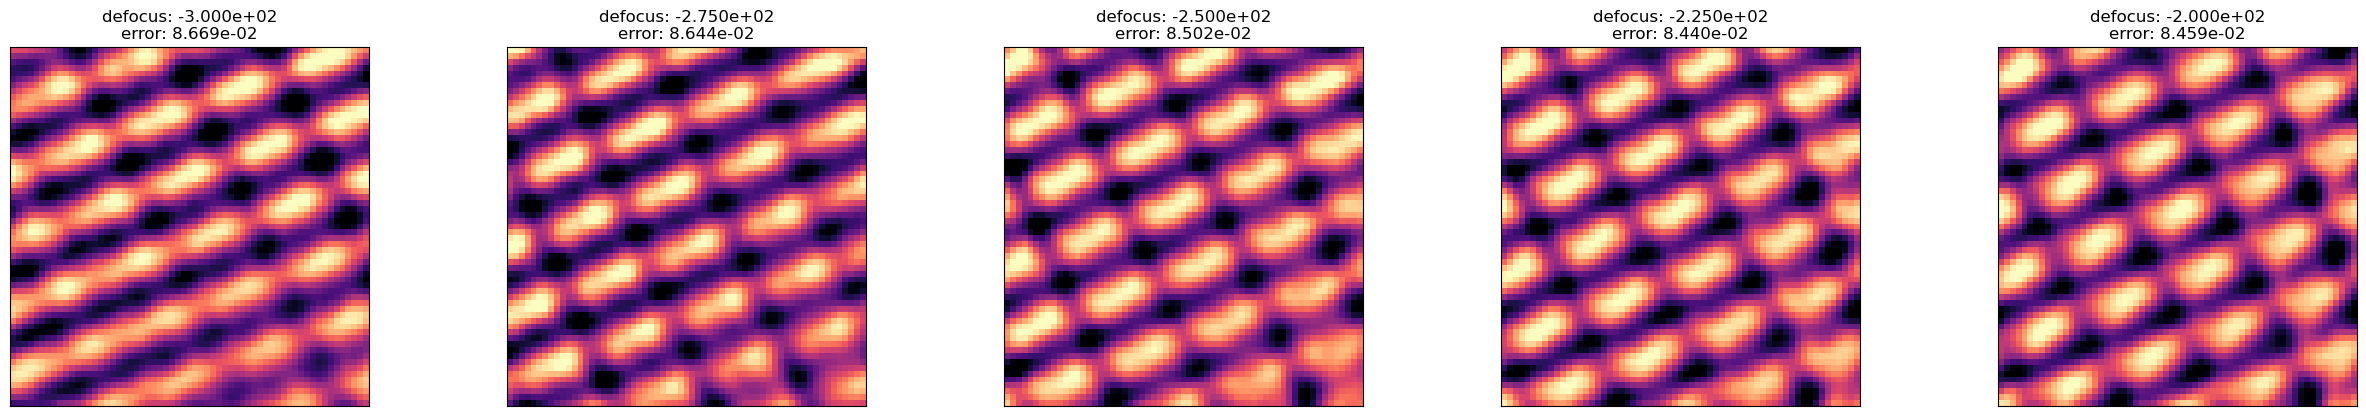

In [ ]:
optimizer.grid_search(
    n_points=(5,),
    error_metric="linear",
    plot_reconstructed_objects=True,
    return_reconstructed_objects=False,
    figsize=(25,8),
    ncols = 5,
)
plt.savefig('..\\pictures\\' + 'singleptycho_grid_search_defocus.png', dpi=300, bbox_inches='tight')

### Bayesian-Optimization with Gaussian Processes

Alternatively, we can perform a more efficient search using Bayesian optimization with Gaussian processes (as implemented in [scikit-optimize](https://scikit-optimize.github.io/stable/)).

In [ ]:
optimizer.optimize(
    n_calls=50,
    n_initial_points=15,
    error_metric='log',
)
optimizer = optimizer.visualize()

We can also optimize more than one parameters at a time (although note this is not always advisable).  
Here, we optimize defocus and rotation jointly and plot the partial dependence of each parameter on the error metric.

Optimizing parameters: 100%|██████████| 50/50 [22:29<00:00, 26.99s/it]

Optimized parameters:
defocus: -236.47142365063976
force_com_rotation: -0.9976820364789392


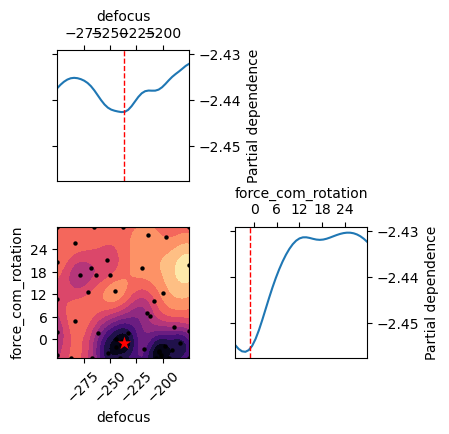

In [ ]:
# Replace/add Optimization parameters in the argument dictionaries
preprocess_args.pop('force_reciprocal_sampling',None)
init_args['defocus']=OptimizationParameter(-215,-300,-175)
preprocess_args['force_com_rotation']=OptimizationParameter(7,-5,30)

optimizer_defocus_rotation = PtychographyOptimizer(
    py4DSTEM.process.phase.SingleslicePtychography,
    init_args = init_args,
    preprocess_args = preprocess_args,
    reconstruction_args = recon_args,
)

optimizer_defocus_rotation.optimize(
    n_calls=50,
    n_initial_points=15,
    error_metric='log',
)
optimizer_defocus_rotation = optimizer_defocus_rotation.visualize()

#### Reconstructing using optimized parameter

Calculating center of mass: 100%|██████████| 1600/1600 [00:00<00:00, 3256.76probe position/s]
Best fit rotation forced to -1 degrees.
Normalizing amplitudes: 100%|██████████| 1600/1600 [00:04<00:00, 346.51probe position/s]
Performing 64 iterations using a complex object type, with the gradient-descent algorithm, with normalization_min: 1 and step_size: 0.5, in batches of max 512 measurements.
Reconstructing object and probe: 100%|██████████| 64/64 [00:11<00:00,  5.64 iter/s]


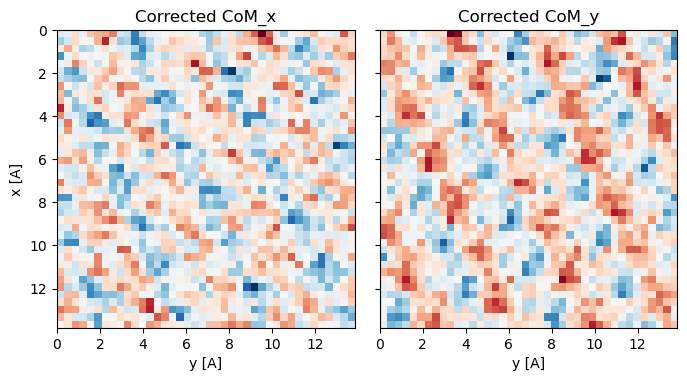

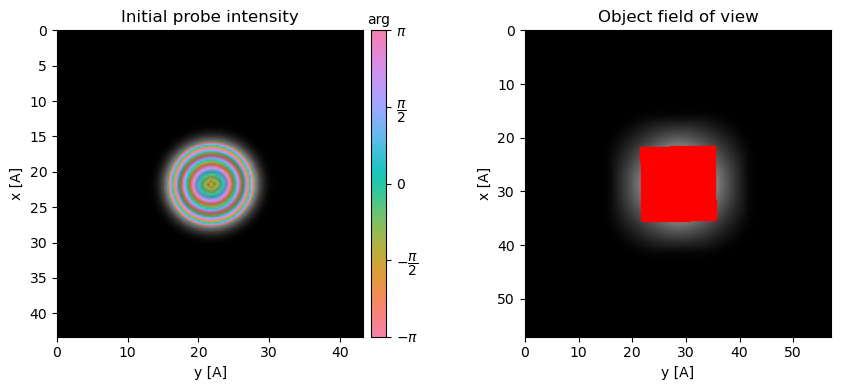

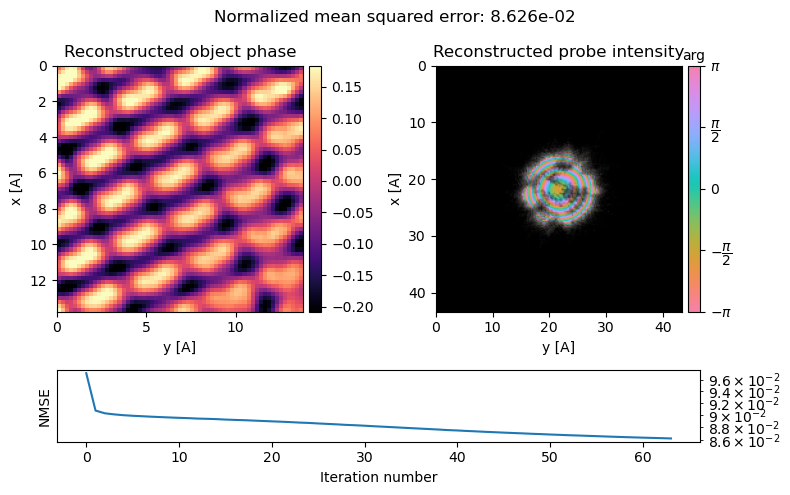

In [31]:
ptycho_partial = py4DSTEM.process.phase.SingleslicePtychography(
    datacube=dataset,
    energy=300e3,
    defocus=-236,
    vacuum_probe_intensity = probe.data,
    verbose=True,
    device='gpu', # uncomment if you have access to a GPU
    storage='cpu', # uncomment if you have access to a GPU
).preprocess(
    plot_center_of_mass = True,
    plot_rotation=True,
    plot_probe_overlaps=True,
    vectorized_com_calculation = False, # disable default CoM vectorized calc
    store_initial_arrays= False, # don't store arrays necessary for reset=True
    force_com_rotation = -1, # set the CoM rotation to the optimized value
    max_batch_size= 128, # set max batch size for GPU memory
).reconstruct(
    num_iter = 64,
    seed_random=0,
    max_batch_size=512,
).visualize(
)

In [ ]:
full_data = py4DSTEM.read(path+'processed_al1.h5')

Calculating center of mass: 100%|██████████| 65536/65536 [00:19<00:00, 3279.25probe position/s]
Best fit rotation forced to -1 degrees.
Normalizing amplitudes: 100%|██████████| 65536/65536 [03:10<00:00, 344.31probe position/s]
Performing 64 iterations using a complex object type, with the gradient-descent algorithm, with normalization_min: 1 and step_size: 0.5, in batches of max 512 measurements.
Reconstructing object and probe: 100%|██████████| 64/64 [07:34<00:00,  7.11s/ iter]


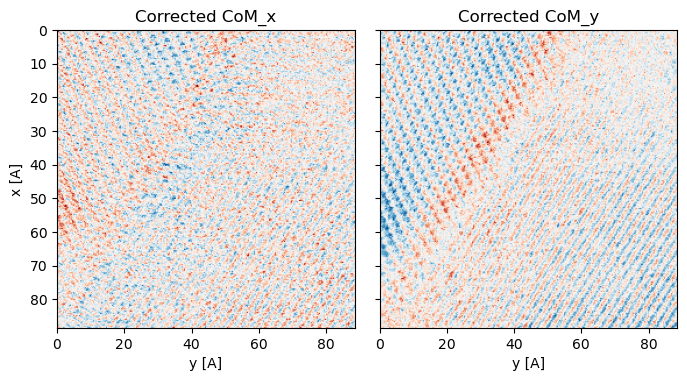

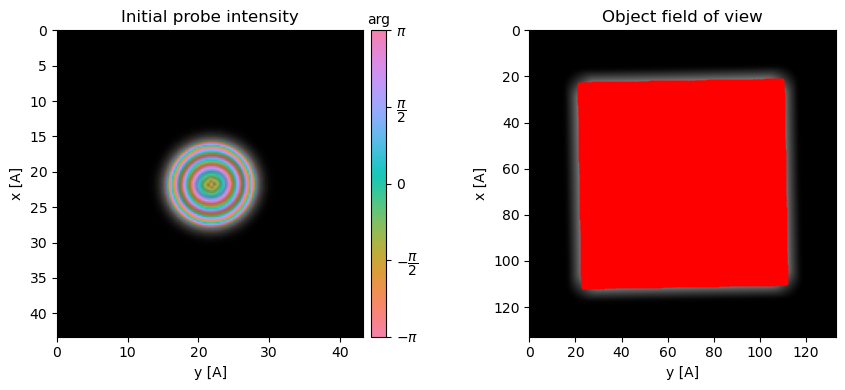

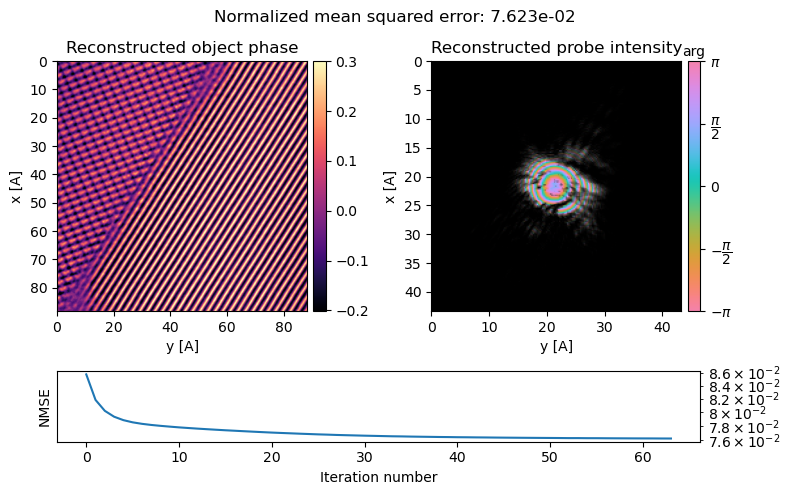

In [19]:
ptycho__full = py4DSTEM.process.phase.SingleslicePtychography(
    datacube=full_data,
    energy=300e3,
    defocus=-236,
    vacuum_probe_intensity = probe.data,
    verbose=True,
    device='gpu', # uncomment if you have access to a GPU
    storage='cpu', # uncomment if you have access to a GPU
).preprocess(
    plot_center_of_mass = True,
    plot_rotation=True,
    plot_probe_overlaps=True,
    vectorized_com_calculation = False, # disable default CoM vectorized calc
    store_initial_arrays= False, # don't store arrays necessary for reset=True
    force_com_rotation = -1, # set the CoM rotation to the optimized value
    max_batch_size= 128, # set max batch size for GPU memory
).reconstruct(
    num_iter = 64,
    seed_random=0,
    max_batch_size=512,
).visualize(
)

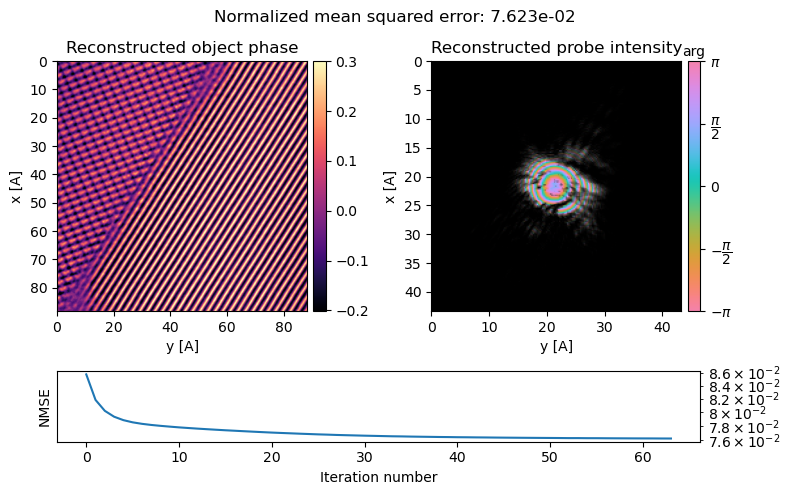

In [23]:
ptycho__full.visualize()
plt.savefig('..\\pictures\\' + 'ptycho_full.png', dpi=300, bbox_inches='tight')

In [22]:
import matplotlib.pyplot as plt